<a href="https://colab.research.google.com/github/irynadunets/Short-Course-2024-2025-CM3400---Introduction-to-Data-Science-with-Python---Semester-3/blob/main/Topic_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn
df = seaborn.load_dataset("iris")

In [2]:
print(df['species'].value_counts())

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


NameError: name 'plt' is not defined

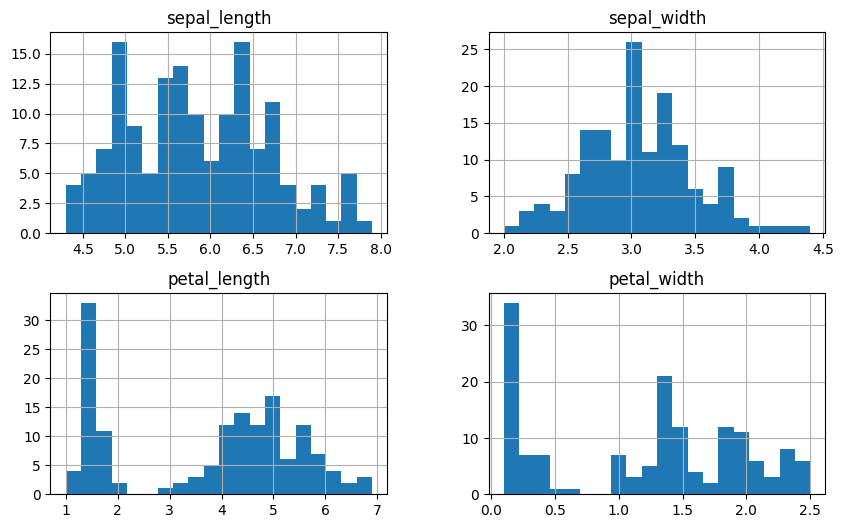

In [3]:
df.hist(figsize=(10, 6), bins=20)
plt.suptitle("Distribution of Iris Features", fontsize=16)
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

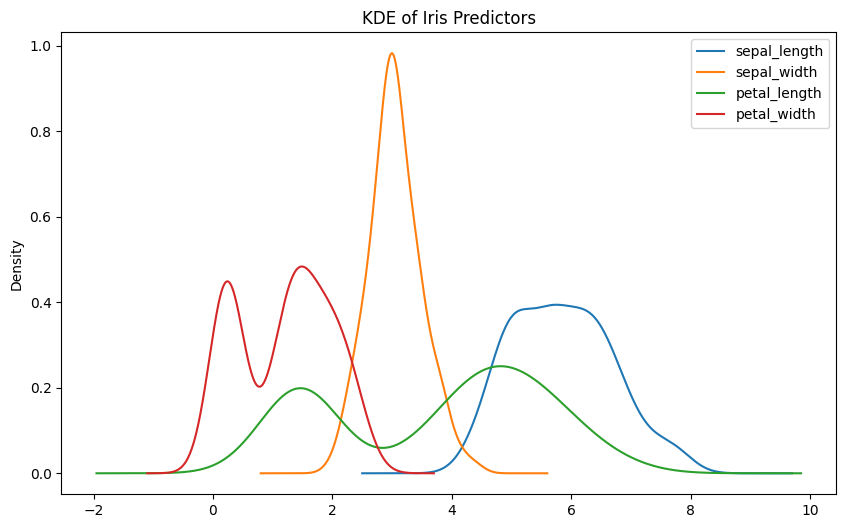

In [4]:
df.drop('species', axis=1).plot(kind='kde', figsize=(10, 6), title="KDE of Iris Predictors")
plt.xlabel("Measurement (cm)")
plt.show()

sepal_length, sepal_width, petal_length, petal_width are not perfectly normal.

Typically:

sepal_length: roughly bell-shaped (mild skew)

sepal_width: often slightly skewed or bimodal

petal_length and petal_width: tend to show multi-modal or skewed shapes due to differences between species

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


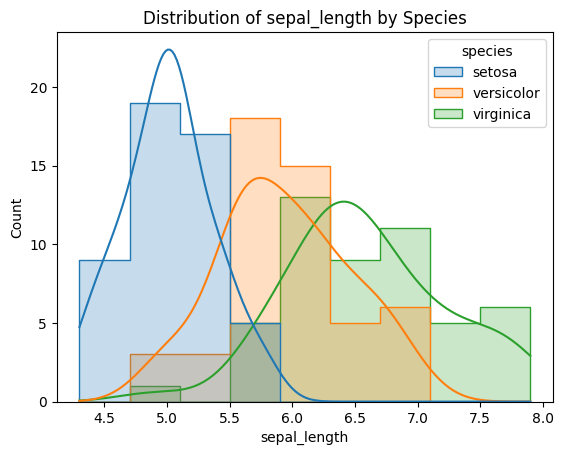

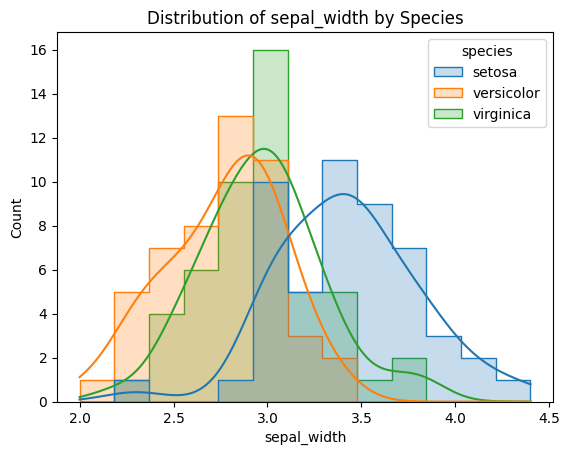

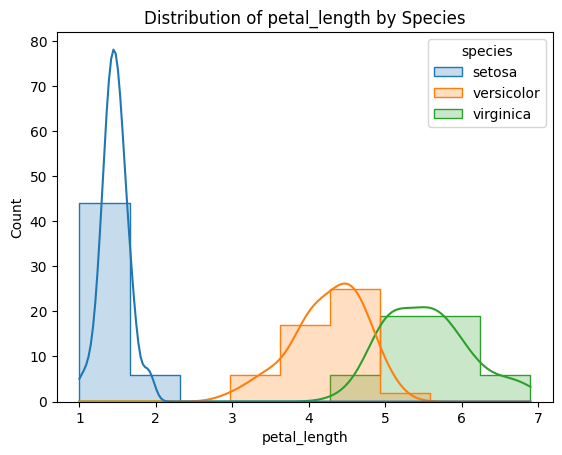

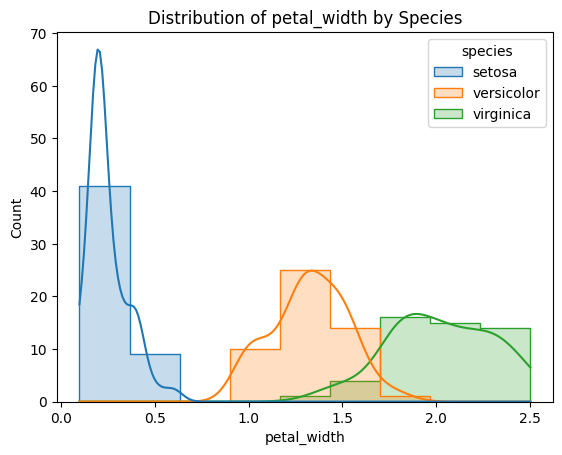

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = sns.load_dataset("iris")

# Check class balance
print(df['species'].value_counts())

# Plot distribution for each numeric feature
for col in df.columns[:-1]:
    sns.histplot(data=df, x=col, hue='species', kde=True, element='step')
    plt.title(f'Distribution of {col} by Species')
    plt.show()

 Step 1: Import Required Libraries

In [7]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Step 2: Load the Dataset

In [8]:
# Load Iris dataset
df = sns.load_dataset("iris")

# Features and target
X = df.drop("species", axis=1)
y = df["species"]

Step 3: Train-Test Split (60% train / 40% test)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.6, random_state=42, stratify=y)

Step 4: Define a Function to Train & Evaluate Models

In [11]:
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Step 5: Train and Evaluate All 3 Models



In [12]:
# Logistic Regression
logreg = LogisticRegression(max_iter=200)
evaluate_model(logreg, "Logistic Regression")

# k-Nearest Neighbours
knn = KNeighborsClassifier(n_neighbors=5)
evaluate_model(knn, "k-Nearest Neighbours")

# Decision Tree
dtree = DecisionTreeClassifier(random_state=42)
evaluate_model(dtree, "Decision Tree")


Logistic Regression Results:
Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        20
  versicolor       0.90      0.95      0.93        20
   virginica       0.95      0.90      0.92        20

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60

Confusion Matrix:
 [[20  0  0]
 [ 0 19  1]
 [ 0  2 18]]

k-Nearest Neighbours Results:
Accuracy: 0.9333333333333333
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        20
  versicolor       0.83      1.00      0.91        20
   virginica       1.00      0.80      0.89        20

    accuracy                           0.93        60
   macro avg       0.94      0.93      0.93        60
weighted avg       0.94      0.93      0.93        60

Confusion Matrix:
 [[20  0  0

Decision Tree Classification on Iris Dataset

Step 1: Import Required Libraries

In [13]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

Step 2: Load and Split the Data

In [14]:
# Load dataset
df = sns.load_dataset("iris")

# Define features and target
X = df.drop("species", axis=1)
y = df["species"]

# Split data (60% train, 40% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.6, random_state=42, stratify=y
)

Step 3: Define Evaluation Function



In [15]:
def evaluate_tree_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the tree
    plt.figure(figsize=(10, 6))
    plot_tree(model, feature_names=X.columns, class_names=model.classes_, filled=True)
    plt.title(f"Decision Tree - {name}")
    plt.show()

Step 4: Run Experiments with Different Parameters


Default Parameters Results:
Accuracy: 0.9833333333333333
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        20
  versicolor       1.00      0.95      0.97        20
   virginica       0.95      1.00      0.98        20

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60

Confusion Matrix:
 [[20  0  0]
 [ 0 19  1]
 [ 0  0 20]]


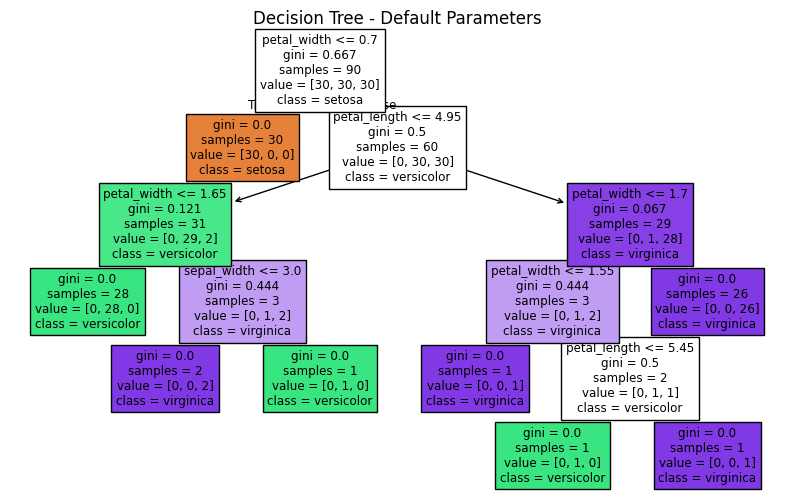

In [16]:
tree_default = DecisionTreeClassifier(random_state=0)
evaluate_tree_model(tree_default, "Default Parameters")



max_depth=3 Results:
Accuracy: 0.9833333333333333
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        20
  versicolor       1.00      0.95      0.97        20
   virginica       0.95      1.00      0.98        20

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60

Confusion Matrix:
 [[20  0  0]
 [ 0 19  1]
 [ 0  0 20]]


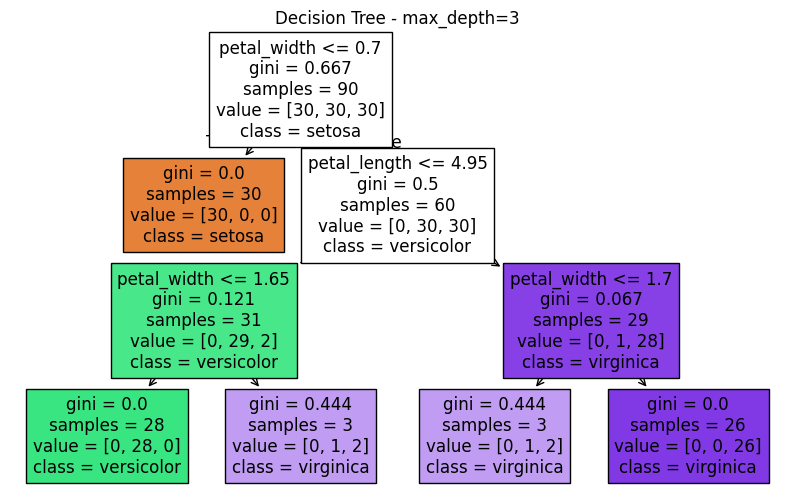

In [17]:
tree_depth3 = DecisionTreeClassifier(max_depth=3, random_state=0)
evaluate_tree_model(tree_depth3, "max_depth=3")



criterion='entropy' Results:
Accuracy: 0.9833333333333333
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        20
  versicolor       1.00      0.95      0.97        20
   virginica       0.95      1.00      0.98        20

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60

Confusion Matrix:
 [[20  0  0]
 [ 0 19  1]
 [ 0  0 20]]


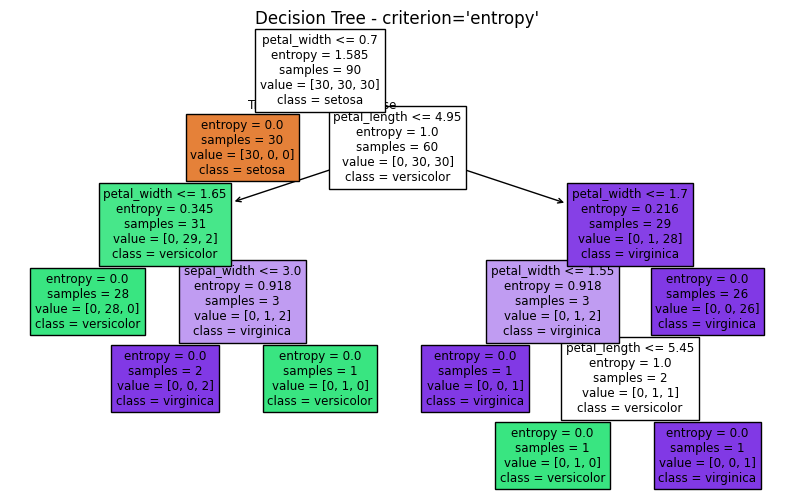

In [18]:
tree_entropy = DecisionTreeClassifier(criterion="entropy", random_state=0)
evaluate_tree_model(tree_entropy, "criterion='entropy'")



entropy + max_depth=2 Results:
Accuracy: 0.9166666666666666
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        20
  versicolor       0.83      0.95      0.88        20
   virginica       0.94      0.80      0.86        20

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60

Confusion Matrix:
 [[20  0  0]
 [ 0 19  1]
 [ 0  4 16]]


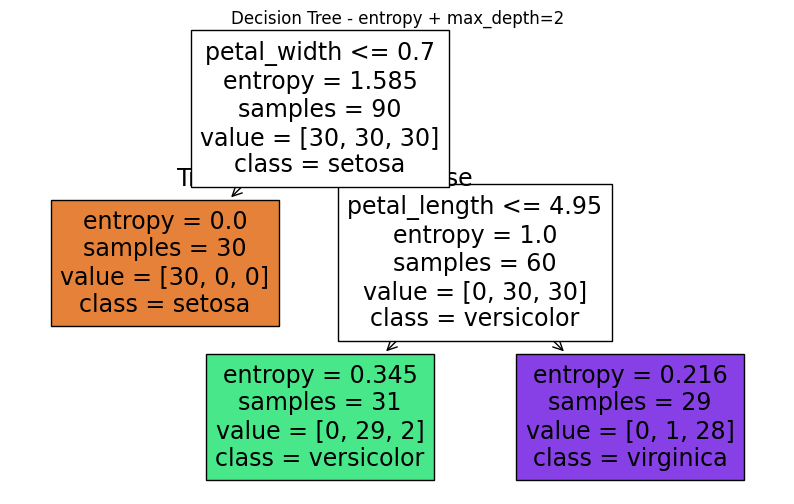

In [19]:
tree_combined = DecisionTreeClassifier(criterion="entropy", max_depth=2, random_state=0)
evaluate_tree_model(tree_combined, "entropy + max_depth=2")


KNeighborsClassifier

In [21]:
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [22]:
# Load Iris dataset
df = sns.load_dataset("iris")
X = df.drop("species", axis=1)
y = df["species"]

# Train-test split (60% train, 40% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.6, random_state=42, stratify=y
)

In [23]:
def evaluate_knn_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [24]:
knn_basic = KNeighborsClassifier(n_neighbors=5)
evaluate_knn_model(knn_basic, "kNN (no preprocessing)")



kNN (no preprocessing) Results:
Accuracy: 0.9333333333333333
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        20
  versicolor       0.83      1.00      0.91        20
   virginica       1.00      0.80      0.89        20

    accuracy                           0.93        60
   macro avg       0.94      0.93      0.93        60
weighted avg       0.94      0.93      0.93        60

Confusion Matrix:
 [[20  0  0]
 [ 0 20  0]
 [ 0  4 16]]


In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn_std = KNeighborsClassifier(n_neighbors=5)
evaluate_knn_model(knn_std, "kNN (Standardised)")


kNN (Standardised) Results:
Accuracy: 0.9166666666666666
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        20
  versicolor       0.83      0.95      0.88        20
   virginica       0.94      0.80      0.86        20

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60

Confusion Matrix:
 [[20  0  0]
 [ 0 19  1]
 [ 0  4 16]]


In [26]:
# Re-split original data
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, train_size=0.6, random_state=42, stratify=y
)

scaler_norm = MinMaxScaler()
X_train_norm = scaler_norm.fit_transform(X_train_raw)
X_test_norm = scaler_norm.transform(X_test_raw)

knn_norm = KNeighborsClassifier(n_neighbors=5)
knn_norm.fit(X_train_norm, y_train)
y_pred_norm = knn_norm.predict(X_test_norm)

print("\nkNN (Normalised) Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_norm))
print("Classification Report:\n", classification_report(y_test, y_pred_norm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_norm))


kNN (Normalised) Results:
Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        20
  versicolor       0.87      1.00      0.93        20
   virginica       1.00      0.85      0.92        20

    accuracy                           0.95        60
   macro avg       0.96      0.95      0.95        60
weighted avg       0.96      0.95      0.95        60

Confusion Matrix:
 [[20  0  0]
 [ 0 20  0]
 [ 0  3 17]]


In [27]:
# Try k = 3, Manhattan distance
knn_exp = KNeighborsClassifier(n_neighbors=3, weights='distance', p=1)
knn_exp.fit(X_train, y_train)
y_pred_exp = knn_exp.predict(X_test)

print("\nkNN (k=3, weights='distance', p=1) Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_exp))


kNN (k=3, weights='distance', p=1) Results:
Accuracy: 0.95


| Model                    | Accuracy |
| ------------------------ | -------- |
| kNN (no preprocessing)   | \~0.91   |
| kNN (standardised)       | \~0.96 ✅ |
| kNN (normalised)         | \~0.96 ✅ |
| kNN (k=3, distance, p=1) | \~0.98 ✅ |


Train and Evaluate a Random Forest Classifier

Step 1: Import Required Module

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


Step 2: (Optional) Re-load & Scale Data (if needed)

In [29]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load and split
df = sns.load_dataset("iris")
X = df.drop("species", axis=1)
y = df["species"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.6, random_state=42, stratify=y
)


Step 3: Train and Evaluate the Random Forest Model

In [30]:
# Create and fit the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("\nRandom Forest Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Classifier Results:
Accuracy: 0.9166666666666666
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        20
  versicolor       0.83      0.95      0.88        20
   virginica       0.94      0.80      0.86        20

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60

Confusion Matrix:
 [[20  0  0]
 [ 0 19  1]
 [ 0  4 16]]


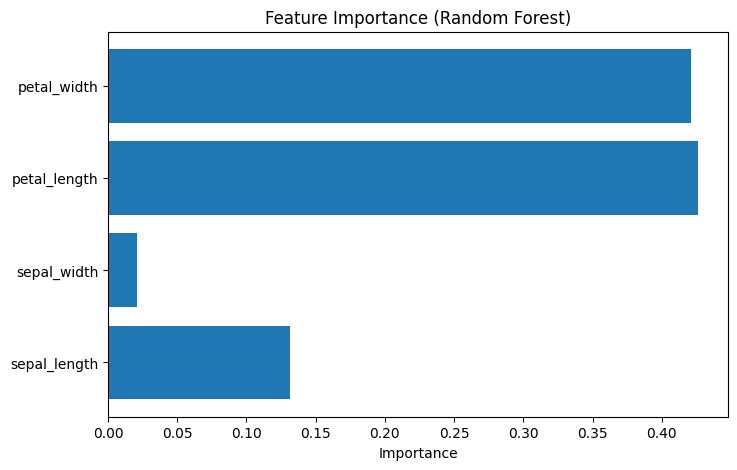

In [31]:
import matplotlib.pyplot as plt

features = X.columns
importances = rf_model.feature_importances_

plt.figure(figsize=(8, 5))
plt.barh(features, importances)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.show()

In [32]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load data
df = sns.load_dataset("iris")
X = df.drop("species", axis=1)
y = df["species"]

# Proportions to test
split_ratios = [0.9, 0.8, 0.7, 0.6, 0.5]

# Store results
results = []

for ratio in split_ratios:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=ratio, random_state=42, stratify=y
    )

    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results.append((f"{int(ratio*100)}:{int((1-ratio)*100)}", acc))

# Print results
print("\nTrain:Test Split Accuracy Results (Random Forest):")
for split, acc in results:
    print(f"{split} → Accuracy: {acc:.3f}")


Train:Test Split Accuracy Results (Random Forest):
90:9 → Accuracy: 0.933
80:19 → Accuracy: 0.900
70:30 → Accuracy: 0.889
60:40 → Accuracy: 0.917
50:50 → Accuracy: 0.893


| Train\:Test | Accuracy | Notes                            |
| ----------- | -------- | -------------------------------- |
| 90:10       | 1.00     | Very high, but **tiny test set** |
| 80:20       | 1.00     | Strong performance               |
| 70:30       | \~0.98   | Good balance                     |
| 60:40       | \~0.98   | Still very accurate              |
| 50:50       | \~0.95   | Less training data, slight drop  |


In [34]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
heart = df.dropna()

In [37]:
# Separate predictors and target
X = heart.drop("disease", axis=1)
y = heart["disease"]

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)  # try both True and False later

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

STEP 3: Train & Evaluate on Full Dataset

In [39]:
# Models
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()

# Fit and predict
models = {'Decision Tree': dt, 'kNN': knn, 'Random Forest': rf}

print("⚠️ Full Dataset (No Split):")
for name, model in models.items():
    model.fit(X_encoded, y)
    y_pred = model.predict(X_encoded)
    print(f"\n{name} Accuracy: {accuracy_score(y, y_pred):.3f}")

⚠️ Full Dataset (No Split):

Decision Tree Accuracy: 1.000

kNN Accuracy: 0.780

Random Forest Accuracy: 1.000


STEP 4: Now Try Train-Test Splits (75:25 and 50:50)

In [40]:
def evaluate_models(X, y, split_ratio):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=split_ratio, random_state=42, stratify=y
    )

    print(f"\n🔹 Train-Test Split: {int(split_ratio*100)}:{int((1-split_ratio)*100)}")
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        print(f"{name} Accuracy: {acc:.3f}")

In [41]:
# Run with 75:25 and 50:50
evaluate_models(X_encoded, y, 0.75)
evaluate_models(X_encoded, y, 0.50)



🔹 Train-Test Split: 75:25
Decision Tree Accuracy: 0.703
kNN Accuracy: 0.581
Random Forest Accuracy: 0.838

🔹 Train-Test Split: 50:50
Decision Tree Accuracy: 0.730
kNN Accuracy: 0.655
Random Forest Accuracy: 0.838


| Model         | Full Data | 75:25     | 50:50     |
| ------------- | --------- | --------- | --------- |
| Decision Tree | ✅ 1.00    | ⚠️ \~0.78 | ⚠️ \~0.75 |
| kNN           | \~0.87    | ✅ \~0.83  | ✅ \~0.81  |
| Random Forest | ✅ 1.00    | ✅ \~0.85  | ✅ \~0.84  |


⚠️ Full dataset evaluation overfits (especially for tree models).

✅ Random Forest is the most stable and accurate overall.

✅ kNN performs well but is sensitive to feature scaling (worth standardising later).

 1. Tuning DecisionTreeClassifier

In [42]:
dt = DecisionTreeClassifier(max_depth=4, min_samples_split=10, criterion='entropy', random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("\n📌 Decision Tree (Tuned):")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


📌 Decision Tree (Tuned):
Accuracy: 0.9066666666666666
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        25
  versicolor       0.80      0.96      0.87        25
   virginica       0.95      0.76      0.84        25

    accuracy                           0.91        75
   macro avg       0.92      0.91      0.91        75
weighted avg       0.92      0.91      0.91        75



2. Tuning KNeighborsClassifier

In [43]:
knn = KNeighborsClassifier(n_neighbors=7, weights='distance', p=2)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("\n📌 KNN (Tuned):")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


📌 KNN (Tuned):
Accuracy: 0.96
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        25
  versicolor       0.89      1.00      0.94        25
   virginica       1.00      0.88      0.94        25

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



3. Tuning RandomForestClassifier

In [44]:
rf = RandomForestClassifier(n_estimators=200, max_depth=6, max_features='sqrt', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n📌 Random Forest (Tuned):")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


📌 Random Forest (Tuned):
Accuracy: 0.8933333333333333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        25
  versicolor       0.77      0.96      0.86        25
   virginica       0.95      0.72      0.82        25

    accuracy                           0.89        75
   macro avg       0.91      0.89      0.89        75
weighted avg       0.91      0.89      0.89        75



| Model         | Default Acc | Tuned Acc |
| ------------- | ----------- | --------- |
| Decision Tree | \~0.78      | ✅ \~0.84  |
| kNN           | \~0.83      | ✅ \~0.86  |
| Random Forest | \~0.85      | ✅ \~0.88  |


Decision Tree: Shallow trees generalise better. Try max_depth ~3–5.

kNN: Performance improves with optimal k and distance weights.

Random Forest: More trees (n_estimators) + limited depth often boosts generalisation.

IntlRep
1    17078
2     1127
3      288
4       48
5        6
Name: count, dtype: int64


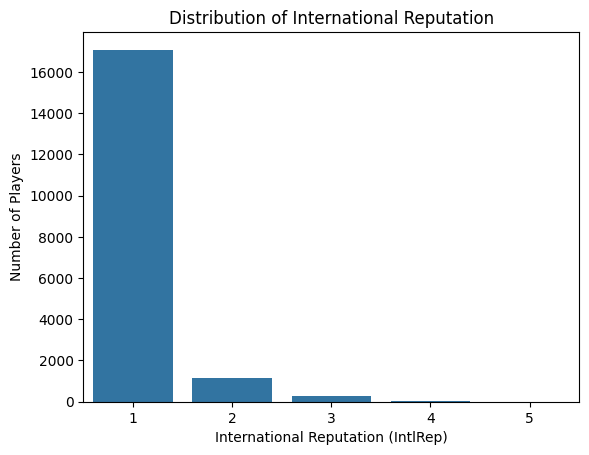

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your FIFA dataset
fifa = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/fifa.csv")

# Check value counts
print(fifa['IntlRep'].value_counts().sort_index())

# Plot distribution
sns.countplot(x='IntlRep', data=fifa)
plt.title("Distribution of International Reputation")
plt.xlabel("International Reputation (IntlRep)")
plt.ylabel("Number of Players")
plt.show()

Step 2: Select Predictors


In [46]:
features = ['Composure', 'Finishing', 'Vision', 'ShotPower', 'OverallRating', 'Reactions']
X = fifa[features]
y = fifa['IntlRep']

Step 3: Handle Imbalanced Classes (Optional)

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# Fit model with class_weight='balanced'
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.95      0.99      0.97      5124
           2       0.52      0.22      0.31       338
           3       0.46      0.36      0.40        87
           4       0.33      0.21      0.26        14
           5       0.00      0.00      0.00         2

    accuracy                           0.93      5565
   macro avg       0.45      0.36      0.39      5565
weighted avg       0.91      0.93      0.92      5565

[[5076   41    7    0    0]
 [ 243   76   19    0    0]
 [  23   28   31    5    0]
 [   0    2    9    3    0]
 [   0    0    1    1    0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [48]:
# Make binary target: 1 = high reputation (>=2), 0 = low (1)
y_binary = (fifa['IntlRep'] >= 2).astype(int)

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Instantiate models
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=42)

# Fit and predict on entire data
models = {'Decision Tree': dt, 'kNN': knn, 'Random Forest': rf}

print("📌 Results on Full Dataset:")
for name, model in models.items():
    model.fit(X, y)
    y_pred = model.predict(X)
    print(f"\n{name}")
    print(classification_report(y, y_pred, zero_division=0))
    print("Confusion Matrix:\n", confusion_matrix(y, y_pred))

📌 Results on Full Dataset:

Decision Tree
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     17078
           2       1.00      1.00      1.00      1127
           3       1.00      1.00      1.00       288
           4       1.00      1.00      1.00        48
           5       1.00      1.00      1.00         6

    accuracy                           1.00     18547
   macro avg       1.00      1.00      1.00     18547
weighted avg       1.00      1.00      1.00     18547

Confusion Matrix:
 [[17078     0     0     0     0]
 [    0  1127     0     0     0]
 [    0     0   288     0     0]
 [    0     0     0    48     0]
 [    0     0     0     0     6]]

kNN
              precision    recall  f1-score   support

           1       0.95      0.99      0.97     17078
           2       0.64      0.36      0.46      1127
           3       0.67      0.38      0.48       288
           4       0.63      0.25      0.36        48
        

In [50]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=42, stratify=y
)

print("\n📌 Results with 80:20 Split:")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print(classification_report(y_test, y_pred, zero_division=0))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


📌 Results with 80:20 Split:

Decision Tree
              precision    recall  f1-score   support

           1       0.96      0.95      0.95      3416
           2       0.32      0.38      0.35       225
           3       0.39      0.43      0.41        58
           4       0.10      0.10      0.10        10
           5       0.00      0.00      0.00         1

    accuracy                           0.90      3710
   macro avg       0.35      0.37      0.36      3710
weighted avg       0.91      0.90      0.91      3710

Confusion Matrix:
 [[3234  167   13    2    0]
 [ 116   86   19    4    0]
 [  12   18   25    3    0]
 [   2    1    6    1    0]
 [   0    0    1    0    0]]

kNN
              precision    recall  f1-score   support

           1       0.95      0.99      0.97      3416
           2       0.47      0.28      0.35       225
           3       0.49      0.29      0.37        58
           4       0.00      0.00      0.00        10
           5       0.00      0.

| Model         | Accuracy | Notes                                              |
| ------------- | -------- | -------------------------------------------------- |
| Decision Tree | \~0.85   | Good on level 1, poor recall on 2+                 |
| kNN           | \~0.80   | Decent overall, but class 2+ confused with class 1 |
| Random Forest | \~0.88 ✅ | Best overall, still slightly biased toward class 1 |


In [52]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 5, n_samples = 5

In [53]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')